In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import datetime as dt
import missingno as miss

import seaborn as sns
import numpy as np
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [ ]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

In [ ]:
default ="%Y-%m-%d %H:%M:%S.%f"
fmt = "%m/%d/%Y %I:%M:%S %p"
now.strftime(default)
now.strftime(fmt)

In [ ]:
weather_df = pd.read_csv ('london_weather_MODIFIED - london_weather_MODIFIED.csv')

In [ ]:
weather_df.head()

In [ ]:
weather_df.info()

# Converting Date Column into a datetime dtype

In [7]:
%%time
## Make a datetime index using pd.to_datetime
weather_df['temp_datetime'] = pd.to_datetime(weather_df['date'])
weather_df

CPU times: total: 0 ns
Wall time: 5.01 ms


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,temp_datetime
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00,1970-01-01 00:00:00.019790101
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00,1970-01-01 00:00:00.019790102
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00,1970-01-01 00:00:00.019790103
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00,1970-01-01 00:00:00.019790104
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00,1970-01-01 00:00:00.019790105
...,...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN,1970-01-01 00:00:00.020201227
15337,20201228,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN,1970-01-01 00:00:00.020201228
15338,20201229,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN,1970-01-01 00:00:00.020201229
15339,20201230,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN,1970-01-01 00:00:00.020201230


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  temp_datetime     15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


In [10]:
weather_df['temp_datetime'][0]

Timestamp('1970-01-01 00:00:00.019790101')

In [11]:
%%time
## Creating/testing our time format


fmt = '%m/%d/%Y %H:%M'

## Test Format
weather_df['temp_datetime'] = pd.to_datetime(weather_df['temp_datetime'],
                                              format=fmt)

CPU times: total: 0 ns
Wall time: 37.5 ms


In [12]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  temp_datetime     15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


# Set Date as Index

In [18]:
df_ts = weather_df.set_index('temp_datetime')
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1970-01-01 00:00:00.019790101 to 1970-01-01 00:00:00.020201231
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.3 MB


In [19]:
df_ts.index

DatetimeIndex(['1970-01-01 00:00:00.019790101',
               '1970-01-01 00:00:00.019790102',
               '1970-01-01 00:00:00.019790103',
               '1970-01-01 00:00:00.019790104',
               '1970-01-01 00:00:00.019790105',
               '1970-01-01 00:00:00.019790106',
               '1970-01-01 00:00:00.019790107',
               '1970-01-01 00:00:00.019790108',
               '1970-01-01 00:00:00.019790109',
               '1970-01-01 00:00:00.019790110',
               ...
               '1970-01-01 00:00:00.020201222',
               '1970-01-01 00:00:00.020201223',
               '1970-01-01 00:00:00.020201224',
               '1970-01-01 00:00:00.020201225',
               '1970-01-01 00:00:00.020201226',
               '1970-01-01 00:00:00.020201227',
               '1970-01-01 00:00:00.020201228',
               '1970-01-01 00:00:00.020201229',
               '1970-01-01 00:00:00.020201230',
               '1970-01-01 00:00:00.020201231'],
              dtype=

# Keeping only Year 2000 and higher

In [20]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [21]:
plt.rcParams['figure.figsize'] = [12,3]

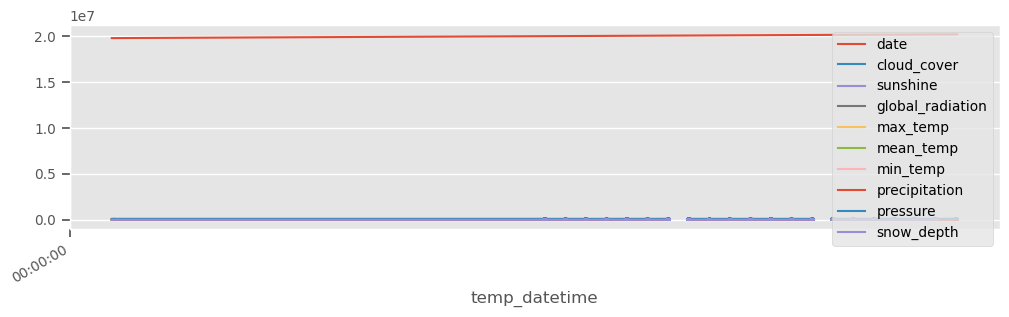

In [23]:
df_ts.plot();

In [24]:
df_ts.loc['2000']

KeyError: '2000'

<AxesSubplot: xlabel='temp_datetime'>

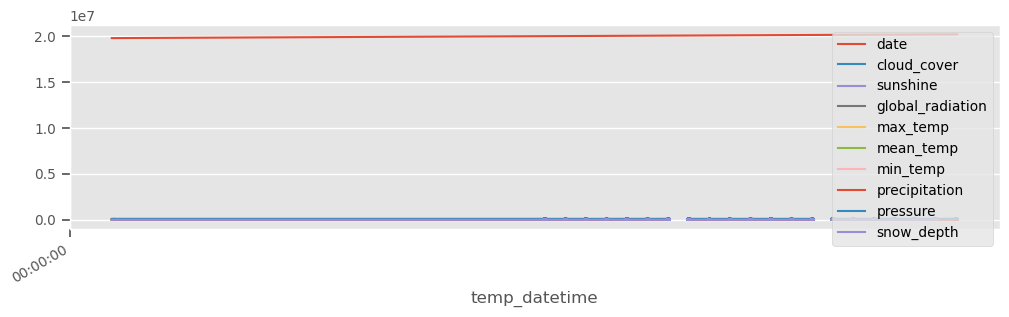

In [25]:
df_ts.plot()

In [26]:
df_temp.isna().sum()

NameError: name 'df_temp' is not defined

In [ ]:
# Fill with back fill
ts_bfill = df_min.fillna(method='bfill')

#plot backfilled data
ax = ts_bfill.plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='bfill', ylabel="Temperature");

In [ ]:
ts_ffill = df_min.fillna(method='ffill')
#plot forward data
ax = ts_ffill.plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='bfill', ylabel="Temperature");

In [ ]:
# Interpolate missing data
ts_interpolate = df_min.interpolate()

# Plot interpolated data
ax = ts_interpolate.plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='bfill', ylabel="Temperature");